In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### Imorting data

In [19]:
xls = pd.ExcelFile('Case_study_data.xlsx')
churned=pd.read_excel(xls,sheet_name=1)
active=pd.read_excel(xls,sheet_name=0)

#### creating data frames for active and churned customers

In [20]:
df_active=active.copy()
df_churned=churned.copy()

#### sort data as per date

In [21]:
df_churned.sort_values('CHURN_DATE')

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
5713,AMR-94059866,Closed,2002-01-06,2002-11-08,2002-06-08,SO,DW6000,Vars,Indirect,Satex,...,Broadband Remote,0,Direct,1.0,21-1-1987,25.0,8,0,0.0,N
842,AMR-90508278,Closed,2002-01-12,2002-11-10,2002-06-12,Elite,HN9000,NaN,Indirect,Spyder Technologies Inc (P10),...,Spaceway,0,Hughes Sales Agents,2.0,14-1-1926,86.0,5,.,1.0,N
4861,AMR-93412780,Closed,2002-01-15,2002-11-18,2002-06-17,SO,HN7000S,Web Orders,Direct,Satellite Country Inc (SA),...,Broadband Remote,EXPRESS REPAIR BASIC,Hughes Sales Agents,1.0,19-2-1988,24.0,6,1,0.0,Y
2082,AMR-91444408,Closed,2002-01-09,2002-11-23,2002-06-17,NaN,NaN,Vars,Direct,LiveBridge Communications LLC,...,Spaceway,0,Hughes Sales Agents,NaN,25-4-1981,31.0,8,.,0.0,Y
9230,DTV-94460265,Closed,2002-01-16,2002-11-25,2002-06-21,Pro,HN7000S,Sales Agents,Indirect,Hughes Web Order,...,Broadband Remote,EXPRESS REPAIR BASIC,Direct,2.0,1-1-1940,72.0,5,1,0.0,NaN
9494,Q-91254866,Closed,2002-01-16,2002-11-29,2002-06-23,Professional,DW7000,Vars,Indirect,TAG,...,Broadband Remote,EXPRESS REPAIR BASIC,Dealer - Direct Order,1.0,3-6-1953,59.0,D,1,0.0,N
6932,AMR-94965746,Closed,2002-01-09,2002-12-05,2002-06-23,Home,HN9000,Sales Agents,Indirect,Red Ventures LLC (SA),...,Spaceway,0,Hughes Sales Agents,1.0,4-8-1980,32.0,4,1,0.0,Y
5227,AMR-93713509,Closed,2002-01-16,2002-12-13,2002-06-30,SO,DW6000,Sales Agents,Direct,LiveBridge Communications LLC,...,Broadband Remote,EXPRESS REPAIR BASIC,Direct,NaN,24-9-1954,58.0,A,1,1.0,Y
7801,DSS-91677420,Closed,2002-01-12,2002-12-17,2002-06-30,Basic,HN9000,Call Centers,Indirect,Communication Solutions LLC (CC),...,Spaceway,EXPRESS REPAIR BASIC,Direct,2.0,27-12-1961,51.0,0,1,1.0,NaN
5248,AMR-93728794,Closed,2002-01-07,2002-12-20,2002-06-29,NaN,DW4000,Web Orders,Indirect,Satellite Video,...,Spaceway,0,National Sales,1.0,22-12-1969,43.0,3,1,0.0,Y


In [22]:
df_active.sort_values('FIRST_COMMUNICATION_DATE')

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
5331,AMR-33462323,Active,1900-01-01,1901-11-07,Basic,UNK,NaN,Indirect,AmericanSat,HNS Customers,...,Spaceway,0,DPC Classic upgrade,1.0,3-8-1947,65,D,0.0,0.0,N
6656,AMR-38241402,Active,1900-01-01,1902-07-11,Proplus,NaN,NaN,Indirect,LiveBridge Communications LLC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,16-11-1950,62,4,2.0,1.0,N
2734,AMR-24631075,Active,1900-01-01,1902-08-17,Proplus,DW4020,Web orders,Indirect,TAG,HNS Customers,...,Broadband Remote,0,Retail,NaN,15-6-1985,27,8,1.0,0.0,N
5202,AMR-33080292,Active,1900-01-01,1903-05-05,NaN,HN7000S,NaN,Indirect,TAG,HNS Customers,...,Broadband Remote,0,Dealer-Generated Sale,2.0,23-8-1973,39,0,1.0,0.0,N
4001,AMR-28938943,Active,1900-01-01,1901-12-23,Proplus,HN7000S,Retail/others,Indirect,Hughes Web Order,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,4-2-1957,55,3,2.0,0.0,N
2780,AMR-24818600,Active,1900-01-01,1902-07-12,Proplus,DW6000,NaN,Indirect,ACS Pre-Install,HNS Customers,...,Spaceway,0,DW6000 Upgrade,1.0,4-1-1960,52,0,1.0,0.0,Y
7396,AMR-40759976,Active,1900-01-01,1902-06-28,Elite,UNK,Sales Agents,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,26-2-1974,38,6,1.0,1.0,N
8221,AMR-43702735,Active,1900-01-01,1901-06-26,Elite,UNK,Vars,Indirect,RS&I,HNS Customers,...,Broadband Remote,0,Retail,2.0,23-4-1948,64,3,0.0,NaN,N
4410,AMR-30382492,Active,1900-01-01,1902-03-30,Elite,UNK,Retail/others,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,NaN,Retail,1.0,.,.,NaN,0.0,NaN,NaN
1163,AMR-19020764,Active,1900-01-01,1902-04-11,Proplus,HN7000S,Vars,Indirect,AmericanSat,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,NaN,2-4-1977,35,7,1.0,0.0,NaN


In [23]:
df_active.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [24]:
df_churned.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [25]:
print(df_churned.columns)
print(df_active.columns)

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'CHURN_DATE', 'UPGRADE_DATE', 'SERVICE_PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
       'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')
Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE',
       'UPGRADE_DATE', 'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL',
       'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE', 'COMPANY_SOURCE_NAME',
       'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIPCODE',
       'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC',
       'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'DATE_OF_BIRTH',
   

### dropping ir relevnt columns from dataframes

In [26]:
df_active =df_active.drop(columns = ['FIRST_COMMUNICATION_DATE','DATE_OF_BIRTH','EMAIL_ADDRESS','ADDRESS','FIRST_NAME','LAST_NAME'])

In [27]:
df_churned = df_churned.drop(columns = ['FIRST_COMMUNICATION_DATE','CHURN_DATE','DATE_OF_BIRTH', 'FIRST_NAME', 'LAST_NAME','ADDRESS'  ])

In [28]:
print(df_churned.columns)
print(df_active.columns)

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE', 'SERVICE_PLAN',
       'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'CITY', 'STATE', 'ZIPCODE', 'EMAIL_ADDRESS',
       'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')
Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE',
       'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'CITY', 'STATE', 'ZIPCODE',
       'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')


In [29]:
df_active =df_active.drop(columns = ['CITY','STATE','ZIPCODE'])
df_churned = df_churned.drop(columns = ['CITY','STATE','ZIPCODE'])

In [30]:
print(df_churned.columns)
print(df_active.columns)

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE', 'SERVICE_PLAN',
       'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'COMPANY_SOURCE_NAME', 'EMAIL_ADDRESS', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'GENDER', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')
Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE',
       'SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'SALES_SOURCE', 'COMPANY_SOURCE_NAME', 'FEEDBACK', 'SATELLITE',
       'SITE_TYPE_DESC', 'WARRANTY_NAME', 'MOST_RECENT_SALES_CHANNEL',
       'GENDER', 'AGE', 'INCOME', 'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN',
       'COMPUTER_OWNER'],
      dtype='object')


### TREATING ACTIVE CUSTOMER DATA

In [31]:
df_active.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,NaN,SPACEWAY3,Broadband Remote,0,HN7000 Upgrade,2.0,69,0,1.0,0.0,N
1,AMR-14837287,Active,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,GOOD,HZN2-VER-4K,Spaceway,0,Retail,2.0,43,4,1.0,0.0,N
2,AMR-14837803,Active,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,BAD,SM5-VER-15K,Broadband Remote,0,National Sales,2.0,58,4,1.0,0.0,N
3,AMR-14837821,Active,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,NaN,SPACEWAY3,Spaceway,0,Direct,NaN,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,GOOD,0,Broadband Remote,0,DW6000 Upgrade,1.0,36,7,0.0,0.0,NaN


#### creating table of % missing data

In [32]:
total = df_active.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df_active.isnull().sum(axis=0)/df_active.isnull().count(axis=0))*100).sort_values(ascending=False)


missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
COMPUTER_OWNER,3055,30.553055
SALES_CHANNEL,2906,29.062906
FEEDBACK,1914,19.141914
PRESENCE_OF_CHILDREN,1315,13.151315
GENDER,1271,12.711271
SERVICE_ PLAN,1239,12.391239
WARRANTY_NAME,957,9.570957
SALES_SOURCE,693,6.930693
MODEL,676,6.760676
SATELLITE,396,3.960396


In [33]:
df_active.dtypes

SITE_ACCOUNT_NUMBER                  object
ACCOUNT_STATUS                       object
UPGRADE_DATE                 datetime64[ns]
SERVICE_ PLAN                        object
MODEL                                object
SALES_CHANNEL                        object
DIRECT_INDIRECT_CHANNEL              object
SALES_SOURCE                         object
COMPANY_SOURCE_NAME                  object
FEEDBACK                             object
SATELLITE                            object
SITE_TYPE_DESC                       object
WARRANTY_NAME                        object
MOST_RECENT_SALES_CHANNEL            object
GENDER                              float64
AGE                                  object
INCOME                               object
MARITAL_STATUS                      float64
PRESENCE_OF_CHILDREN                float64
COMPUTER_OWNER                       object
dtype: object

#### filling missing categorical data with mode

In [34]:
df_active['COMPUTER_OWNER'] = df_active['COMPUTER_OWNER'].fillna(df_active['COMPUTER_OWNER'].mode()[0])
df_active['SALES_CHANNEL'] = df_active['SALES_CHANNEL'].fillna(df_active['SALES_CHANNEL'].mode()[0])
df_active['FEEDBACK'] = df_active['FEEDBACK'].fillna(df_active['FEEDBACK'].mode()[0])
df_active['PRESENCE_OF_CHILDREN'] = df_active['PRESENCE_OF_CHILDREN'].fillna(df_active['PRESENCE_OF_CHILDREN'].mode()[0])
df_active['GENDER'] = df_active['GENDER'].fillna(df_active['GENDER'].mode()[0])
df_active['SERVICE_ PLAN'] = df_active['SERVICE_ PLAN'].fillna(df_active['SERVICE_ PLAN'].mode()[0])
df_active['WARRANTY_NAME'] = df_active['WARRANTY_NAME'].fillna(df_active['WARRANTY_NAME'].mode()[0])
df_active['SALES_SOURCE'] = df_active['SALES_SOURCE'].fillna(df_active['SALES_SOURCE'].mode()[0])
df_active['MODEL'] = df_active['MODEL'].fillna(df_active['MODEL'].mode()[0])
df_active['SATELLITE'] = df_active['SATELLITE'].fillna(df_active['SATELLITE'].mode()[0])
df_active['MARITAL_STATUS'] = df_active['MARITAL_STATUS'].fillna(df_active['MARITAL_STATUS'].mode()[0])
df_active['INCOME'] = df_active['INCOME'].fillna(df_active['INCOME'].mode()[0])



In [35]:
df_active.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'},inplace=True)

### TREATING CHURNED CUSTOMER DATA

In [36]:
df_churned.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,EMAIL_ADDRESS,...,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,HNS Customers,rbranson@southerninspection.co,...,SPACEWAY3,Broadband Remote,NaN,Dealer-Generated Sale,2.0,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,HNS Customers,howvood@hughes.net,...,SPACEWAY3,Broadband Remote,NaN,National Sales,NaN,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,HNS Customers,pavel.groisman@hughes.net,...,SPACEWAY3,Broadband Remote,NaN,Direct,2.0,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,NaT,SO,DW4000,NaN,Indirect,TAG,HNS Customers,jfary@hughes.net,...,SPACEWAY3,Broadband Remote,NaN,Direct,1.0,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,HNS Customers,dp_photo@hughes.net,...,SPACEWAY3,Broadband Remote,NaN,Dealer-Generated Sale,1.0,56.0,6,0,0.0,N


#### creating table of % missing data

In [37]:
total = df_churned.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df_churned.isnull().sum(axis=0)/df_churned.isnull().count(axis=0))*100).sort_values(ascending=False)


missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
COMPUTER_OWNER,3243,32.43
SALES_CHANNEL,2602,26.02
FEEDBACK,2028,20.28
SERVICE_PLAN,1482,14.82
PRESENCE_OF_CHILDREN,1252,12.52
GENDER,1238,12.38
SATELLITE,1013,10.13
UPGRADE_DATE,879,8.79
DIRECT_INDIRECT_CHANNEL,784,7.84
MODEL,710,7.10


#### filling missing categorical data with mode

In [38]:
df_churned['COMPUTER_OWNER'] = df_churned['COMPUTER_OWNER'].fillna(df_churned['COMPUTER_OWNER'].mode()[0])
df_churned['SALES_CHANNEL'] = df_churned['SALES_CHANNEL'].fillna(df_churned['SALES_CHANNEL'].mode()[0])
df_churned['FEEDBACK'] = df_churned['FEEDBACK'].fillna(df_churned['FEEDBACK'].mode()[0])
df_churned['PRESENCE_OF_CHILDREN'] = df_churned['PRESENCE_OF_CHILDREN'].fillna(df_churned['PRESENCE_OF_CHILDREN'].mode()[0])
df_churned['GENDER'] = df_churned['GENDER'].fillna(df_churned['GENDER'].mode()[0])
df_churned['SERVICE_PLAN'] = df_churned['SERVICE_PLAN'].fillna(df_churned['SERVICE_PLAN'].mode()[0])
df_churned['WARRANTY_NAME'] = df_churned['WARRANTY_NAME'].fillna(df_churned['WARRANTY_NAME'].mode()[0])
df_churned['SALES_SOURCE'] = df_churned['SALES_SOURCE'].fillna(df_churned['SALES_SOURCE'].mode()[0])
df_churned['MODEL'] = df_churned['MODEL'].fillna(df_churned['MODEL'].mode()[0])
df_churned['SATELLITE'] = df_churned['SATELLITE'].fillna(df_churned['SATELLITE'].mode()[0])
df_churned['MARITAL_STATUS'] = df_churned['MARITAL_STATUS'].fillna(df_churned['MARITAL_STATUS'].mode()[0])
df_churned['INCOME'] = df_churned['INCOME'].fillna(df_churned['INCOME'].mode()[0])
df_churned['DIRECT_INDIRECT_CHANNEL'] = df_churned['DIRECT_INDIRECT_CHANNEL'].fillna(df_churned['DIRECT_INDIRECT_CHANNEL'].mode()[0])


#### Now we combine both active and churned data

In [39]:
comb_data = df_active

In [40]:
comb_data.index=comb_data['SITE_ACCOUNT_NUMBER']

In [41]:
df_churned.index=df_churned['SITE_ACCOUNT_NUMBER']

In [42]:
comb_data = pd.concat([comb_data, df_churned])

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


#### seprating customers who ugraded and who did not

In [43]:
temp=   comb_data[comb_data['UPGRADE_DATE'].isnull()==False]       # upgraded
temp1 = comb_data[comb_data['UPGRADE_DATE'].isnull()]              # did not upgrade

In [44]:
temp.head()

,ACCOUNT_STATUS,AGE,COMPANY_SOURCE_NAME,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,EMAIL_ADDRESS,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,...,MOST_RECENT_SALES_CHANNEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_DATE,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,HNS Customers,N,Indirect,NaN,GOOD,2.0,0,1,...,HN7000 Upgrade,0.0,Vars,UNKNOWN,SPACEWAY3,Proplus,AMR-11112345,Broadband Remote,2003-12-14,0
AMR-14837287,Active,43,HNS Customers,N,Indirect,NaN,GOOD,2.0,4,1,...,Retail,0.0,Sales Agents,NCC,HZN2-VER-4K,Pro,AMR-14837287,Spaceway,2006-08-08,0
AMR-14837803,Active,58,HNS Customers,N,Indirect,NaN,BAD,2.0,4,1,...,National Sales,0.0,Call Center,NCC,SM5-VER-15K,Power150,AMR-14837803,Broadband Remote,2004-03-17,0
AMR-14837821,Active,22,HNS Customers,N,Direct,NaN,GOOD,1.0,6,1,...,Direct,1.0,Sales Agents,TAG,SPACEWAY3,Power150,AMR-14837821,Spaceway,2005-03-27,0
AMR-14839297,Active,36,HNS Customers,N,Indirect,NaN,GOOD,1.0,7,0,...,DW6000 Upgrade,0.0,Call Center,TAG,0,Home,AMR-14839297,Broadband Remote,2004-06-14,0


In [45]:
temp.UPGRADE_DATE =1
temp.head()

C:\Users\thebu\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,ACCOUNT_STATUS,AGE,COMPANY_SOURCE_NAME,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,EMAIL_ADDRESS,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,...,MOST_RECENT_SALES_CHANNEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_DATE,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,HNS Customers,N,Indirect,NaN,GOOD,2.0,0,1,...,HN7000 Upgrade,0.0,Vars,UNKNOWN,SPACEWAY3,Proplus,AMR-11112345,Broadband Remote,1,0
AMR-14837287,Active,43,HNS Customers,N,Indirect,NaN,GOOD,2.0,4,1,...,Retail,0.0,Sales Agents,NCC,HZN2-VER-4K,Pro,AMR-14837287,Spaceway,1,0
AMR-14837803,Active,58,HNS Customers,N,Indirect,NaN,BAD,2.0,4,1,...,National Sales,0.0,Call Center,NCC,SM5-VER-15K,Power150,AMR-14837803,Broadband Remote,1,0
AMR-14837821,Active,22,HNS Customers,N,Direct,NaN,GOOD,1.0,6,1,...,Direct,1.0,Sales Agents,TAG,SPACEWAY3,Power150,AMR-14837821,Spaceway,1,0
AMR-14839297,Active,36,HNS Customers,N,Indirect,NaN,GOOD,1.0,7,0,...,DW6000 Upgrade,0.0,Call Center,TAG,0,Home,AMR-14839297,Broadband Remote,1,0


In [46]:
temp1['UPGRADE_DATE']=0
temp1.head()

C:\Users\thebu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,ACCOUNT_STATUS,AGE,COMPANY_SOURCE_NAME,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,EMAIL_ADDRESS,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,...,MOST_RECENT_SALES_CHANNEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_DATE,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-16515542,Active,65,HNS Customers,N,Indirect,NaN,BAD,1.0,8,0,...,Classic Migration,0.0,Sales Agents,LiveBridge Communications LLC,0,Power150,AMR-16515542,Spaceway,0,0
AMR-17894265,Active,42,HNS Customers,Y,Direct,NaN,GOOD,1.0,5,1,...,HN9000 Upgrade,1.0,Call Center,NRTC,G17-HOR-6K,Proplus,AMR-17894265,Broadband Remote,0,0
AMR-22214969,Active,26,HNS Customers,N,Direct,NaN,GOOD,2.0,6,0,...,DW6000 Upgrade,0.0,Sales Agents,AmericanSat,SM5-VER-7K,Proplus,AMR-22214969,Broadband Remote,0,0
AMR-23693792,Active,58,HNS Customers,N,Indirect,NaN,BAD,1.0,7,0,...,DW6000 Upgrade,0.0,Sales Agents,InfoDish,G17-HOR-2K,Proplus,AMR-23693792,Broadband Remote,0,0
AMR-29523715,Active,59,HNS Customers,N,Indirect,NaN,BAD,2.0,0,1,...,Dealer-Generated Sale,1.0,Sales Agents,InfoDish,AM9-VER-2K,Basic,AMR-29523715,Broadband Remote,0,0


In [47]:
comb_data = pd.concat([temp, temp1])

In [48]:
comb_data

,ACCOUNT_STATUS,AGE,COMPANY_SOURCE_NAME,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,EMAIL_ADDRESS,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,...,MOST_RECENT_SALES_CHANNEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_DATE,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,HNS Customers,N,Indirect,NaN,GOOD,2.0,0,1,...,HN7000 Upgrade,0.0,Vars,UNKNOWN,SPACEWAY3,Proplus,AMR-11112345,Broadband Remote,1,0
AMR-14837287,Active,43,HNS Customers,N,Indirect,NaN,GOOD,2.0,4,1,...,Retail,0.0,Sales Agents,NCC,HZN2-VER-4K,Pro,AMR-14837287,Spaceway,1,0
AMR-14837803,Active,58,HNS Customers,N,Indirect,NaN,BAD,2.0,4,1,...,National Sales,0.0,Call Center,NCC,SM5-VER-15K,Power150,AMR-14837803,Broadband Remote,1,0
AMR-14837821,Active,22,HNS Customers,N,Direct,NaN,GOOD,1.0,6,1,...,Direct,1.0,Sales Agents,TAG,SPACEWAY3,Power150,AMR-14837821,Spaceway,1,0
AMR-14839297,Active,36,HNS Customers,N,Indirect,NaN,GOOD,1.0,7,0,...,DW6000 Upgrade,0.0,Call Center,TAG,0,Home,AMR-14839297,Broadband Remote,1,0
AMR-14840229,Active,51,HNS Customers,N,Indirect,NaN,GOOD,2.0,7,1,...,HN9000 Upgrade,0.0,Sales Agents,UNKNOWN,SPACEWAY3,Pro,AMR-14840229,Broadband Remote,1,0
AMR-14841940,Active,56,HNS Customers,N,Indirect,NaN,GOOD,1.0,3,1,...,Retail,0.0,Sales Agents,ValueElectronics,G17-HOR-2K,Power150,AMR-14841940,Broadband Remote,1,0
AMR-14842501,Active,57,HNS Customers,Y,Indirect,NaN,GOOD,1.0,7,0,...,Retail,0.0,Vars,TAG,SM5-VER-5K,Power150,AMR-14842501,Broadband Remote,1,0
AMR-14847927,Active,42,HNS Customers,N,Indirect,NaN,GOOD,2.0,4,2,...,HN9000 Upgrade,0.0,Vars,TAG,AM6-HOR-21K,Home,AMR-14847927,Broadband Remote,1,0


In [49]:
comb_data.rename(columns={'UPGRADE_DATE':'UPGRADE_STATUS'},inplace=True)

In [50]:
comb_data

,ACCOUNT_STATUS,AGE,COMPANY_SOURCE_NAME,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,EMAIL_ADDRESS,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,...,MOST_RECENT_SALES_CHANNEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_STATUS,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,HNS Customers,N,Indirect,NaN,GOOD,2.0,0,1,...,HN7000 Upgrade,0.0,Vars,UNKNOWN,SPACEWAY3,Proplus,AMR-11112345,Broadband Remote,1,0
AMR-14837287,Active,43,HNS Customers,N,Indirect,NaN,GOOD,2.0,4,1,...,Retail,0.0,Sales Agents,NCC,HZN2-VER-4K,Pro,AMR-14837287,Spaceway,1,0
AMR-14837803,Active,58,HNS Customers,N,Indirect,NaN,BAD,2.0,4,1,...,National Sales,0.0,Call Center,NCC,SM5-VER-15K,Power150,AMR-14837803,Broadband Remote,1,0
AMR-14837821,Active,22,HNS Customers,N,Direct,NaN,GOOD,1.0,6,1,...,Direct,1.0,Sales Agents,TAG,SPACEWAY3,Power150,AMR-14837821,Spaceway,1,0
AMR-14839297,Active,36,HNS Customers,N,Indirect,NaN,GOOD,1.0,7,0,...,DW6000 Upgrade,0.0,Call Center,TAG,0,Home,AMR-14839297,Broadband Remote,1,0
AMR-14840229,Active,51,HNS Customers,N,Indirect,NaN,GOOD,2.0,7,1,...,HN9000 Upgrade,0.0,Sales Agents,UNKNOWN,SPACEWAY3,Pro,AMR-14840229,Broadband Remote,1,0
AMR-14841940,Active,56,HNS Customers,N,Indirect,NaN,GOOD,1.0,3,1,...,Retail,0.0,Sales Agents,ValueElectronics,G17-HOR-2K,Power150,AMR-14841940,Broadband Remote,1,0
AMR-14842501,Active,57,HNS Customers,Y,Indirect,NaN,GOOD,1.0,7,0,...,Retail,0.0,Vars,TAG,SM5-VER-5K,Power150,AMR-14842501,Broadband Remote,1,0
AMR-14847927,Active,42,HNS Customers,N,Indirect,NaN,GOOD,2.0,4,2,...,HN9000 Upgrade,0.0,Vars,TAG,AM6-HOR-21K,Home,AMR-14847927,Broadband Remote,1,0


In [51]:
comb_data.INCOME

SITE_ACCOUNT_NUMBER
AMR-11112345     0
AMR-14837287     4
AMR-14837803     4
AMR-14837821     6
AMR-14839297     7
AMR-14840229     7
AMR-14841940     3
AMR-14842501     7
AMR-14847927     4
AMR-14859335     4
AMR-14859461     3
AMR-14864530     6
AMR-14866461     A
AMR-14873604     6
AMR-14873868     6
AMR-14875244     7
AMR-14875495     0
AMR-14876904     0
AMR-14882497     5
AMR-14902253     C
AMR-14903035     9
AMR-14905877     0
AMR-14905924     6
AMR-14908151     0
AMR-14915157     0
AMR-14916700     D
AMR-14922119     7
AMR-14923151     4
AMR-14925390     0
AMR-14928358     4
                ..
DSS9399230       0
DSS9399371       6
DSS9399540       3
DSS9399719       0
DSS9400147       4
DSS9400486       4
DSS9400839       3
DSS9401668       3
DSS9401690       0
DSS9401968       0
DSS9401970       0
DSS9402012       5
DSS9402039       0
DSS9402332       4
DSS9403188       6
DSS9403250       0
DSS9404131       0
DSS9404411       3
DSS9404912       4
DSS9405056       7
DSS9405441 

In [52]:
temp=comb_data[(comb_data['INCOME']=='A')].replace('A',11)
comb_data.update(temp)
temp1=comb_data[(comb_data['INCOME']=='B')].replace('B',12)
comb_data.update(temp1)
temp2=comb_data[(comb_data['INCOME']=='C')].replace('C',13)
comb_data.update(temp2)
temp3=comb_data[(comb_data['INCOME']=='D')].replace('D',14)
comb_data.update(temp3)
temp4=comb_data[(comb_data['INCOME']=='E')].replace('E',15)
comb_data.update(temp4)

In [502]:
comb_data.to_csv('tempo.csv')

In [53]:
total = comb_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((comb_data.isnull().sum(axis=0)/comb_data.isnull().count(axis=0))*100).sort_values(ascending=False)


missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
EMAIL_ADDRESS,10019,50.097505
SITE_TYPE_DESC,74,0.370019
DIRECT_INDIRECT_CHANNEL,45,0.225011
MOST_RECENT_SALES_CHANNEL,28,0.140007
COMPANY_SOURCE_NAME,19,0.095005
ACCOUNT_STATUS,16,0.080004
AGE,9,0.045002
SITE_ACCOUNT_NUMBER,1,0.005000
INCOME,0,0.000000
COMPUTER_OWNER,0,0.000000


In [54]:
comb_data = comb_data.drop(columns= ['EMAIL_ADDRESS'])

In [55]:
comb_data = comb_data.dropna()

In [56]:
total = comb_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((comb_data.isnull().sum(axis=0)/comb_data.isnull().count(axis=0))*100).sort_values(ascending=False)


missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns

,Total,Percent
WARRANTY_NAME,0,0.0
UPGRADE_STATUS,0,0.0
AGE,0,0.0
COMPANY_SOURCE_NAME,0,0.0
COMPUTER_OWNER,0,0.0
DIRECT_INDIRECT_CHANNEL,0,0.0
FEEDBACK,0,0.0
GENDER,0,0.0
INCOME,0,0.0
MARITAL_STATUS,0,0.0


In [57]:
comb_data.MARITAL_STATUS

SITE_ACCOUNT_NUMBER
AMR-11112345     1
AMR-14837287     1
AMR-14837803     1
AMR-14837821     1
AMR-14839297     0
AMR-14840229     1
AMR-14841940     1
AMR-14842501     0
AMR-14847927     2
AMR-14859335     2
AMR-14859461     1
AMR-14864530     1
AMR-14866461     0
AMR-14873604     0
AMR-14873868     0
AMR-14875244     1
AMR-14875495     0
AMR-14876904     0
AMR-14882497     1
AMR-14902253     1
AMR-14903035     0
AMR-14905877     1
AMR-14905924     0
AMR-14908151     1
AMR-14915157     0
AMR-14916700     0
AMR-14922119     1
AMR-14923151     1
AMR-14925390     2
AMR-14928358     0
                ..
DSS9399230       .
DSS9399371       1
DSS9399540       2
DSS9399719       .
DSS9400147       1
DSS9400486       0
DSS9400839       0
DSS9401668       1
DSS9401690       .
DSS9401968       .
DSS9401970       .
DSS9402012       1
DSS9402039       .
DSS9402332       0
DSS9403188       1
DSS9403250       .
DSS9404131       .
DSS9404411       0
DSS9404912       0
DSS9405056       1
DSS9405441 

In [58]:
temp5=comb_data[(comb_data['MARITAL_STATUS']=='.')].replace('.',0.0)
comb_data.update(temp5)

In [59]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19819 entries, AMR-11112345 to T000078824
Data columns (total 20 columns):
ACCOUNT_STATUS               19819 non-null object
AGE                          19819 non-null object
COMPANY_SOURCE_NAME          19819 non-null object
COMPUTER_OWNER               19819 non-null object
DIRECT_INDIRECT_CHANNEL      19819 non-null object
FEEDBACK                     19819 non-null object
GENDER                       19819 non-null float64
INCOME                       19819 non-null object
MARITAL_STATUS               19819 non-null object
MODEL                        19819 non-null object
MOST_RECENT_SALES_CHANNEL    19819 non-null object
PRESENCE_OF_CHILDREN         19819 non-null float64
SALES_CHANNEL                19819 non-null object
SALES_SOURCE                 19819 non-null object
SATELLITE                    19819 non-null object
SERVICE_PLAN                 19819 non-null object
SITE_ACCOUNT_NUMBER          19819 non-null object
SITE_TYPE_D

In [60]:
comb_data.head()

,ACCOUNT_STATUS,AGE,COMPANY_SOURCE_NAME,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,MODEL,MOST_RECENT_SALES_CHANNEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SALES_SOURCE,SATELLITE,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_STATUS,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,HNS Customers,N,Indirect,GOOD,2.0,0,1,HN9000,HN7000 Upgrade,0.0,Vars,UNKNOWN,SPACEWAY3,Proplus,AMR-11112345,Broadband Remote,1.0,0
AMR-14837287,Active,43,HNS Customers,N,Indirect,GOOD,2.0,4,1,HN7000S,Retail,0.0,Sales Agents,NCC,HZN2-VER-4K,Pro,AMR-14837287,Spaceway,1.0,0
AMR-14837803,Active,58,HNS Customers,N,Indirect,BAD,2.0,4,1,HN9000,National Sales,0.0,Call Center,NCC,SM5-VER-15K,Power150,AMR-14837803,Broadband Remote,1.0,0
AMR-14837821,Active,22,HNS Customers,N,Direct,GOOD,1.0,6,1,DW6000,Direct,1.0,Sales Agents,TAG,SPACEWAY3,Power150,AMR-14837821,Spaceway,1.0,0
AMR-14839297,Active,36,HNS Customers,N,Indirect,GOOD,1.0,7,0,HN7000S,DW6000 Upgrade,0.0,Call Center,TAG,0,Home,AMR-14839297,Broadband Remote,1.0,0


#### dropping irrelevant columns

In [61]:
comb_data.drop(['SALES_SOURCE','COMPANY_SOURCE_NAME','SATELLITE','MOST_RECENT_SALES_CHANNEL'],axis=1,inplace=True) #Removing the redundant columns

In [62]:
comb_data.head()

,ACCOUNT_STATUS,AGE,COMPUTER_OWNER,DIRECT_INDIRECT_CHANNEL,FEEDBACK,GENDER,INCOME,MARITAL_STATUS,MODEL,PRESENCE_OF_CHILDREN,SALES_CHANNEL,SERVICE_PLAN,SITE_ACCOUNT_NUMBER,SITE_TYPE_DESC,UPGRADE_STATUS,WARRANTY_NAME
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,N,Indirect,GOOD,2.0,0,1,HN9000,0.0,Vars,Proplus,AMR-11112345,Broadband Remote,1.0,0
AMR-14837287,Active,43,N,Indirect,GOOD,2.0,4,1,HN7000S,0.0,Sales Agents,Pro,AMR-14837287,Spaceway,1.0,0
AMR-14837803,Active,58,N,Indirect,BAD,2.0,4,1,HN9000,0.0,Call Center,Power150,AMR-14837803,Broadband Remote,1.0,0
AMR-14837821,Active,22,N,Direct,GOOD,1.0,6,1,DW6000,1.0,Sales Agents,Power150,AMR-14837821,Spaceway,1.0,0
AMR-14839297,Active,36,N,Indirect,GOOD,1.0,7,0,HN7000S,0.0,Call Center,Home,AMR-14839297,Broadband Remote,1.0,0


#### Converting Categorical variables to Dummy variables

In [63]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [64]:
for c_feature in ['COMPUTER_OWNER', 'DIRECT_INDIRECT_CHANNEL','FEEDBACK','MODEL','SALES_CHANNEL', 'SERVICE_PLAN', 'SITE_TYPE_DESC','WARRANTY_NAME'    ]:
    comb_data[c_feature] = comb_data[c_feature].astype('category')
    comb_data = create_dummies(comb_data , c_feature )

In [65]:
comb_data.head()

,ACCOUNT_STATUS,AGE,GENDER,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,SITE_ACCOUNT_NUMBER,UPGRADE_STATUS,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Direct,...,WARRANTY_NAME_EXPRESS REPAIR BASIC,WARRANTY_NAME_EXPRESS REPAIR BUSINESS WITH TERM,WARRANTY_NAME_EXPRESS REPAIR HOME,WARRANTY_NAME_EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM,WARRANTY_NAME_EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM,WARRANTY_NAME_EXPRESS REPAIR HOME WITH TERM,WARRANTY_NAME_SRVC ASSUR PLUS NEW CUST,WARRANTY_NAME_SRVC ASSUR STD EXISTING CUST NO COMMIT,WARRANTY_NAME_SRVC ASSUR STD NEW CUST,WARRANTY_NAME_Spaceway
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-11112345,Active,69,2.0,0,1,0.0,AMR-11112345,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMR-14837287,Active,43,2.0,4,1,0.0,AMR-14837287,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMR-14837803,Active,58,2.0,4,1,0.0,AMR-14837803,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
AMR-14837821,Active,22,1.0,6,1,1.0,AMR-14837821,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
AMR-14839297,Active,36,1.0,7,0,0.0,AMR-14839297,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
comb_data.ACCOUNT_STATUS = comb_data.ACCOUNT_STATUS.eq('Active').mul(1)

In [67]:

for col in comb_data.columns:
    print(comb_data[col].value_counts())

1    9916
0    9903
Name: ACCOUNT_STATUS, dtype: int64
58.0    580
47.0    516
53.0    495
54.0    460
56.0    459
49.0    451
52.0    448
42.0    442
64.0    439
46.0    438
40.0    432
33.0    431
55.0    415
48.0    412
50.0    410
34.0    409
41.0    408
62.0    404
38.0    400
43.0    397
35.0    397
45.0    396
32.0    395
51.0    394
30.0    389
27.0    386
61.0    379
31.0    378
37.0    374
26.0    371
       ... 
36.0    340
29.0    339
66.0    338
24.0    338
57.0    328
60.0    308
22.0    271
70.0    254
71.0    204
68.0    199
72.0    189
69.0    175
67.0    174
74.0     92
75.0     73
77.0     39
73.0     32
76.0     31
86.0     27
79.0     26
80.0     20
81.0     19
78.0     18
90.0     15
83.0     13
84.0     12
89.0      9
88.0      2
82.0      1
92.0      1
Name: AGE, Length: 69, dtype: int64
1.0    12151
2.0     7668
Name: GENDER, dtype: int64
0.0     5317
6.0     2623
4.0     2119
3.0     2088
5.0     2037
7.0     1423
8.0      966
11.0     740
9.0      696
2.0    

In [68]:
comb_data.drop('SITE_ACCOUNT_NUMBER',axis=1,inplace=True)

#### changing some columns to right format

In [69]:
temp5=comb_data[(comb_data['AGE']=='.')].replace('.',0.0)
comb_data.update(temp5)

In [70]:
comb_data.INCOME = pd.to_numeric(comb_data.INCOME)
comb_data.MARITAL_STATUS = pd.to_numeric(comb_data.MARITAL_STATUS)
comb_data.AGE = pd.to_numeric(comb_data.AGE)

In [71]:
comb_data = comb_data.rename(columns={'WARRANTY_NAME_EXPRESS REPAIR BASIC': 'WARRANTY_NAME_EXPRESS_REPAIR_BASIC', 'WARRANTY_NAME_Broadband Remote': 'WARRANTY_NAME_Broadband_Remote','WARRANTY_NAME_EXPRESS REPAIR BUSINESS WITH TERM': 'WARRANTY_NAME_EXPRESS_REPAIR_BUSINESS_WITH_TERM','WARRANTY_NAME_EXPRESS REPAIR HOME': 'WARRANTY_NAME_EXPRESS_REPAIR_HOME','WARRANTY_NAME_EXPRESS REPAIR HOME W/O COMMITMENT WITH TERM': 'WARRANTY_NAME_EXPRESS_REPAIR_HOME_W/O_COMMITMENT_WITH_TERM','WARRANTY_NAME_EXPRESS REPAIR HOME WITH COMMITMENT WITH TERM': 'WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_COMMITMENT_WITH_TERM','WARRANTY_NAME_EXPRESS REPAIR HOME WITH TERM': 'WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_TERM','WARRANTY_NAME_SRVC ASSUR PLUS NEW CUST': 'WARRANTY_NAME_SRVC_ASSUR_PLUS_NEW_CUST','WARRANTY_NAME_SRVC ASSUR STD EXISTING CUST NO COMMIT': 'WARRANTY_NAME_SRVC_ASSUR_STD_EXISTING_CUST_NO_COMMIT','WARRANTY_NAME_SRVC ASSUR STD NEW CUST':'WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST' })

In [72]:
comb_data = comb_data.drop(columns= ['SALES_CHANNEL_Web orders','SALES_CHANNEL_Retail/Others'])

In [73]:
comb_data = comb_data.rename(columns={'SALES_CHANNEL_Web Orders': 'SALES_CHANNEL_Web_Orders','SERVICE_PLAN_Professional Plus':'SERVICE_PLAN_Professional_Plus'})

In [74]:
comb_data = comb_data.rename(columns={'SALES_CHANNEL_Sales Agents':'SALES_CHANNEL_Sales_Agents'})

In [75]:
comb_data = comb_data.rename(columns={ 'SALES_CHANNEL_Call Centers': 'SALES_CHANNEL_Call_Centers'})

In [76]:
comb_data = comb_data.rename(columns={'WARRANTY_NAME_EXPRESS_REPAIR_HOME_W/O_COMMITMENT_WITH_TERM':'WARRANTY_NAME_EXPRESS_REPAIR_HOME_WO_COMMITMENT_WITH_TERM'})

In [77]:
comb_data = comb_data.rename(columns={'SALES_CHANNEL_Retail/others':'SALES_CHANNEL_Retail_others'})

In [78]:
col_names = list(comb_data)
col_names.remove('ACCOUNT_STATUS')


### Variable reduction using VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [80]:
X = pd.concat([comb_data[comb_data.columns.difference(['ACCOUNT_STATUS'])],comb_data['ACCOUNT_STATUS']], axis=1)
features = "+".join(comb_data.columns.difference(['ACCOUNT_STATUS']))
X.head()

a,b = dmatrices(formula_like='ACCOUNT_STATUS ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
#pd.DataFrame(vif).to_csv('delete3.csv')
print(pd.DataFrame(vif))

     VIF Factor                                           features
0   2546.379099                                          Intercept
1      1.085674                                                AGE
2      1.381206                                   COMPUTER_OWNER_Y
3    474.569533                     DIRECT_INDIRECT_CHANNEL_Direct
4    474.521607                   DIRECT_INDIRECT_CHANNEL_Indirect
5      1.159231                                      FEEDBACK_GOOD
6      1.009535                                             GENDER
7      1.096801                                             INCOME
8      1.165661                                     MARITAL_STATUS
9      1.336086                                       MODEL_DW4020
10     1.755058                                       MODEL_DW6000
11     1.779249                                       MODEL_DW7000
12     2.995292                                      MODEL_HN7000S
13     2.757874                                       MODEL_HN

#### dropping high correlated variables

In [81]:
comb_data = comb_data.drop(columns= ['DIRECT_INDIRECT_CHANNEL_Direct'])

In [82]:
X = pd.concat([comb_data[comb_data.columns.difference(['ACCOUNT_STATUS'])],comb_data['ACCOUNT_STATUS']], axis=1)
features = "+".join(comb_data.columns.difference(['ACCOUNT_STATUS']))
X.head()

a,b = dmatrices(formula_like='ACCOUNT_STATUS ~ '+ features, data = X, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
#pd.DataFrame(vif).to_csv('delete3.csv')
print(pd.DataFrame(vif))

    VIF Factor                                           features
0    71.210998                                          Intercept
1     1.085648                                                AGE
2     1.380963                                   COMPUTER_OWNER_Y
3     1.005392                   DIRECT_INDIRECT_CHANNEL_Indirect
4     1.159194                                      FEEDBACK_GOOD
5     1.009535                                             GENDER
6     1.096764                                             INCOME
7     1.165604                                     MARITAL_STATUS
8     1.335997                                       MODEL_DW4020
9     1.754941                                       MODEL_DW6000
10    1.779216                                       MODEL_DW7000
11    2.995256                                      MODEL_HN7000S
12    2.757857                                       MODEL_HN9000
13    1.496690                                          MODEL_UNK
14    1.18

### Finding Important variables using chi-square test

In [83]:
col_names = comb_data.columns

In [84]:

import scipy.stats as sp
def compute_freq_chi2(x,y):

    freqtab = pd.crosstab(x,y)

    chi2,pval,dof,expected = sp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [85]:

for i in range(0, len(comb_data.columns)):
    print (col_names[i])
    compute_freq_chi2(comb_data[col_names[i]],comb_data['ACCOUNT_STATUS'])
    print('-------------------------------------------------------------')
    
#compute_freq_chi2(comb_data[i],comb_data['ACCOUNT_STATUS'])
    


ACCOUNT_STATUS
ChiSquare test statistic:  19815.000200105693
p-value:  0.0
-------------------------------------------------------------
AGE
ChiSquare test statistic:  1814.810257548012
p-value:  0.0
-------------------------------------------------------------
GENDER
ChiSquare test statistic:  6.889526725387162
p-value:  0.008670222074753021
-------------------------------------------------------------
INCOME
ChiSquare test statistic:  1246.1204042119775
p-value:  2.1034510413260467e-258
-------------------------------------------------------------
MARITAL_STATUS
ChiSquare test statistic:  619.4826507495428
p-value:  3.0272728944894354e-135
-------------------------------------------------------------
PRESENCE_OF_CHILDREN
ChiSquare test statistic:  413.123675866451
p-value:  7.659292835098354e-92
-------------------------------------------------------------
UPGRADE_STATUS
ChiSquare test statistic:  886.0179773808206
p-value:  1.0749067343599529e-194
-----------------------------------

#### removing less contributing variables

In [86]:
new_data = comb_data

In [87]:
new_data = new_data.drop(columns = ['SALES_CHANNEL_Vars', 'WARRANTY_NAME_EXPRESS_REPAIR_BUSINESS_WITH_TERM','WARRANTY_NAME_EXPRESS_REPAIR_HOME_WO_COMMITMENT_WITH_TERM', 'WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_TERM',  ])

In [88]:
new_data = new_data.astype(int)
comb_data = new_data

## Splitting table into Train and Test

In [9]:
from sklearn.model_selection import train_test_split

In [90]:
pd.DataFrame(comb_data.corr()).to_csv('corr.csv')

In [91]:
#dependent variable data
dep_data = comb_data.ACCOUNT_STATUS

In [10]:
train, test = train_test_split( comb_data,
                                test_size = 0.3,
                                random_state = 123 )

### Logistic regression

In [592]:
import statsmodels.api as st
import statsmodels.formula.api as sm

In [593]:
all_columns = "+".join(train.columns.difference( ['ACCOUNT_STATUS'] ))
my_formula = "ACCOUNT_STATUS~" + all_columns
print(my_formula)

ACCOUNT_STATUS~AGE+COMPUTER_OWNER_Y+DIRECT_INDIRECT_CHANNEL_Indirect+FEEDBACK_GOOD+GENDER+INCOME+MARITAL_STATUS+MODEL_DW4020+MODEL_DW6000+MODEL_DW7000+MODEL_HN7000S+MODEL_HN9000+MODEL_UNK+PRESENCE_OF_CHILDREN+SALES_CHANNEL_Call_Centers+SALES_CHANNEL_Retail_others+SALES_CHANNEL_Sales_Agents+SALES_CHANNEL_Web_Orders+SERVICE_PLAN_Basic_Ltd+SERVICE_PLAN_Elite+SERVICE_PLAN_Home+SERVICE_PLAN_Power15+SERVICE_PLAN_Power150+SERVICE_PLAN_Pro+SERVICE_PLAN_Professional+SERVICE_PLAN_Professional_Plus+SERVICE_PLAN_Proplus+SERVICE_PLAN_SO+SITE_TYPE_DESC_Spaceway+UPGRADE_STATUS+WARRANTY_NAME_Broadband_Remote+WARRANTY_NAME_EXPRESS_REPAIR_BASIC+WARRANTY_NAME_EXPRESS_REPAIR_HOME+WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_COMMITMENT_WITH_TERM+WARRANTY_NAME_SRVC_ASSUR_PLUS_NEW_CUST+WARRANTY_NAME_SRVC_ASSUR_STD_EXISTING_CUST_NO_COMMIT+WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST+WARRANTY_NAME_Spaceway


In [594]:
logreg = sm.logit(formula=my_formula, data=comb_data, missing='drop')
result = logreg.fit()

         Current function value: 0.105626
         Iterations: 35


C:\Users\thebu\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [595]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                      Results: Logit
===========================================================================================================================
Model:                                   Logit                               Pseudo R-squared:                    0.848    
Dependent Variable:                      ACCOUNT_STATUS                      AIC:                                 4264.7892
Date:                                    2019-03-07 17:31                    BIC:                                 4572.6707
No. Observations:                        19819                               Log-Likelihood:                      -2093.4  
Df Model:                                38                                  LL-Null:                             -13737.  
Df Residuals:                            19780                               LLR p-value:                         0.0000   
Converged:                               0.0000                              Scale:                               1.0000   
No. Iterations:                          35.0000                                                                           
---------------------------------------------------------------------------------------------------------------------------
                                                             Coef.     Std.Err.     z     P>|z|      [0.025       0.975]   
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -0.3170      0.6135  -0.5167 0.6054       -1.5195       0.8855
AGE                                                          -0.0311      0.0028 -11.0354 0.0000       -0.0366      -0.0255
COMPUTER_OWNER_Y                                             -2.8332      0.0866 -32.7221 0.0000       -3.0029      -2.6635
DIRECT_INDIRECT_CHANNEL_Indirect                              0.2280      0.0915   2.4924 0.0127        0.0487       0.4073
FEEDBACK_GOOD                                                 1.4722      0.0820  17.9434 0.0000        1.3114       1.6330
GENDER                                                       -0.0413      0.0829  -0.4976 0.6188       -0.2038       0.1213
INCOME                                                       -0.0781      0.0120  -6.5272 0.0000       -0.1016      -0.0547
MARITAL_STATUS                                                0.3906      0.0715   5.4624 0.0000        0.2505       0.5308
MODEL_DW4020                                                  3.3119      0.4330   7.6496 0.0000        2.4634       4.1605
MODEL_DW6000                                                 -0.7329      0.1639  -4.4708 0.0000       -1.0542      -0.4116
MODEL_DW7000                                                 -0.9566      0.1884  -5.0773 0.0000       -1.3259      -0.5873
MODEL_HN7000S                                                 2.0882      0.1418  14.7308 0.0000        1.8104       2.3661
MODEL_HN9000                                                  0.0070      0.1304   0.0538 0.9571       -0.2486       0.2627
MODEL_UNK                                                     4.4544      0.3792  11.7466 0.0000        3.7112       5.1976
PRESENCE_OF_CHILDREN                                         -0.4525      0.0985  -4.5960 0.0000       -0.6455      -0.2595
SALES_CHANNEL_Call_Centers                                  -21.8725    612.4295  -0.0357 0.9715    -1222.2122    1178.4673
SALES_CHANNEL_Retail_others                                   4.3278      0.4717   9.1748 0.0000        3.4033       5.2524
SALES_CHANNEL_Sales_Agents                                    0.4480      0.0841   5.3259 0.0000        0.2831       0.6128
SALES_CHANNEL_Web_Orders                                    -22.3055   1167.9597  -0.0191 0.9848    -2311.4646    2266.8535
SERVICE_PLAN_Basic_Ltd                

#### removing least contributing variables based on p value

In [596]:
logreg = sm.logit('ACCOUNT_STATUS~AGE+COMPUTER_OWNER_Y+DIRECT_INDIRECT_CHANNEL_Indirect+FEEDBACK_GOOD\
+INCOME+MARITAL_STATUS+MODEL_DW4020+MODEL_DW6000+MODEL_DW7000+MODEL_HN7000S+MODEL_UNK\
+PRESENCE_OF_CHILDREN+SALES_CHANNEL_Retail_others+SALES_CHANNEL_Sales_Agents\
+SERVICE_PLAN_Basic_Ltd+SERVICE_PLAN_Elite+SERVICE_PLAN_Home\
+SERVICE_PLAN_Pro\
+SERVICE_PLAN_Proplus+SITE_TYPE_DESC_Spaceway+UPGRADE_STATUS\
+WARRANTY_NAME_EXPRESS_REPAIR_BASIC\
\
+WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST', data=comb_data, missing='drop')
result = logreg.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.201679
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
======================================================================================
Model:                      Logit                   Pseudo R-squared:        0.709    
Dependent Variable:         ACCOUNT_STATUS          AIC:                     8042.1624
Date:                       2019-03-07 17:31        BIC:                     8231.6279
No. Observations:           19819                   Log-Likelihood:          -3997.1  
Df Model:                   23                      LL-Null:                 -13737.  
Df Residuals:               19795                   LLR p-value:             0.0000   
Converged:                  1.0000                  Scale:                   1.0000   
No. Iterations:             10.0000                                                   
--------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------------------
Intercept                             -3.1020   0.4575  -6.7807 0.0000 -3.9987 -2.2054
AGE                                   -0.0334   0.0020 -16.4182 0.0000 -0.0373 -0.0294
COMPUTER_OWNER_Y                      -2.8164   0.0639 -44.0919 0.0000 -2.9416 -2.6912
DIRECT_INDIRECT_CHANNEL_Indirect       0.2586   0.0662   3.9047 0.0001  0.1288  0.3883
FEEDBACK_GOOD                          1.5101   0.0590  25.6021 0.0000  1.3945  1.6257
INCOME                                -0.0834   0.0082 -10.1311 0.0000 -0.0995 -0.0673
MARITAL_STATUS                         0.6770   0.0522  12.9703 0.0000  0.5747  0.7793
MODEL_DW4020                           4.1039   0.4133   9.9306 0.0000  3.2939  4.9139
MODEL_DW6000                          -0.8290   0.1037  -7.9932 0.0000 -1.0323 -0.6257
MODEL_DW7000                          -1.2664   0.1232 -10.2761 0.0000 -1.5080 -1.0249
MODEL_HN7000S                          1.3906   0.0670  20.7607 0.0000  1.2593  1.5219
MODEL_UNK                              3.9787   0.2190  18.1714 0.0000  3.5495  4.4078
PRESENCE_OF_CHILDREN                  -0.7489   0.0702 -10.6710 0.0000 -0.8864 -0.6113
SALES_CHANNEL_Retail_others            5.6775   0.4609  12.3180 0.0000  4.7742  6.5809
SALES_CHANNEL_Sales_Agents             1.6117   0.0652  24.7089 0.0000  1.4839  1.7396
SERVICE_PLAN_Basic_Ltd                 0.9269   0.1063   8.7188 0.0000  0.7185  1.1352
SERVICE_PLAN_Elite                    -0.6911   0.0804  -8.5963 0.0000 -0.8487 -0.5335
SERVICE_PLAN_Home                      0.4604   0.0960   4.7965 0.0000  0.2723  0.6485
SERVICE_PLAN_Pro                       0.7054   0.1055   6.6857 0.0000  0.4986  0.9122
SERVICE_PLAN_Proplus                   1.9475   0.1016  19.1742 0.0000  1.7484  2.1466
SITE_TYPE_DESC_Spaceway               -1.4415   0.0613 -23.5038 0.0000 -1.5617 -1.3213
UPGRADE_STATUS                         4.4998   0.4389  10.2516 0.0000  3.6395  5.3601
WARRANTY_NAME_EXPRESS_REPAIR_BASIC    -4.1074   0.1963 -20.9269 0.0000 -4.4920 -3.7227
WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST -3.8097   0.5346  -7.1257 0.0000 -4.8575 -2.7618
======================================================================================

"""

### comparing model performance on train/test based on probability 

In [597]:
train_gini = 2*metrics.roc_auc_score(train['ACCOUNT_STATUS'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['ACCOUNT_STATUS'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9513868015596669
The Gini Index for the model built on the Test Data is :  0.9474926819068856


In [598]:
#for train data
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['ACCOUNT_STATUS']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
SITE_ACCOUNT_NUMBER,,
AMR-44954467,1,0.986210
AMR-21157193,1,0.999997
Q-91990451,0,0.360354
AMR-19179949,1,0.585002
DTV-94232061,0,0.599725


In [599]:
#for test data
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['ACCOUNT_STATUS']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
SITE_ACCOUNT_NUMBER,,
AMR-92950395,0,0.009532
AMR-36981348,1,0.999187
DSS9180888,0,0.005212
AMR-94482406,0,0.000119
AMR-91695341,0,0.048058


### now Calculating Sensitivity and specificity for various Cut offs

In [600]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)
    roc_like_df.head(10)

In [601]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [602]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,total
0,0.489796,0.929618,0.916365,1.845983


#### cut off  = 0.4897

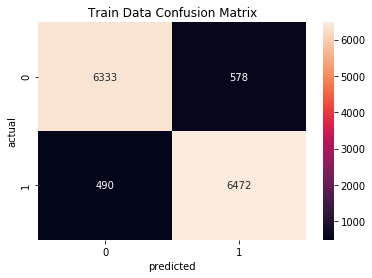

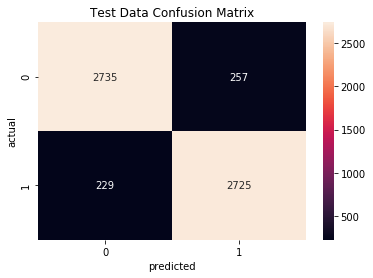

In [603]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)
sns.heatmap(pd.crosstab(train_predict['actual'], train_predict['predicted']), annot=True, fmt='.0f')
plt.title('Train Data Confusion Matrix')
plt.show()
sns.heatmap(pd.crosstab(test_predict['actual'], test_predict['predicted']), annot=True, fmt='.0f')
plt.title('Test Data Confusion Matrix')
plt.show()

In [604]:
train_predict.head()

,actual,prob,predicted
SITE_ACCOUNT_NUMBER,,,
AMR-44954467,1,0.986210,1
AMR-21157193,1,0.999997,1
Q-91990451,0,0.360354,0
AMR-19179949,1,0.585002,1
DTV-94232061,0,0.599725,1


In [605]:
test_predict.head()

,actual,prob,predicted
SITE_ACCOUNT_NUMBER,,,
AMR-92950395,0,0.009532,0
AMR-36981348,1,0.999187,1
DSS9180888,0,0.005212,0
AMR-94482406,0,0.000119,0
AMR-91695341,0,0.048058,0


#### Checking our model accuracy

In [606]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9230159302241765
The overall accuracy score for the Test Data  is :  0.9182643794147326


### Decile Analysis

####       for train

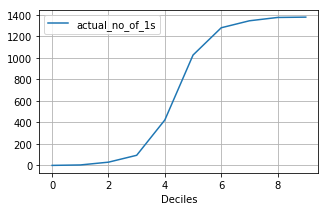

In [607]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
#test['Deciles']=pd.qcut(test['prob'],10, labels=False)
train_predict.head()
df = train_predict[['actual']].groupby(train_predict.Deciles).sum().sort_index(ascending = False).reset_index()
df = df.rename(columns = {'actual': 'actual_no_of_1s'})
df[-15:].plot(x='Deciles', y=['actual_no_of_1s'], figsize=(5,3), grid=True)

#### for test

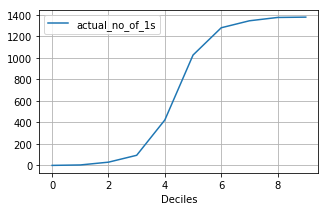

In [608]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)
#test['Deciles']=pd.qcut(test['prob'],10, labels=False)
test_predict.head()
df1 = test_predict[['actual']].groupby(test_predict.Deciles).sum().sort_index(ascending = False).reset_index()
df1 = df.rename(columns = {'actual': 'actual_no_of_1s'})
df1[-15:].plot(x='Deciles', y=['actual_no_of_1s'], figsize=(5,3), grid=True)

### DECISION TREE

In [609]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [11]:
X_train = train.drop(['ACCOUNT_STATUS'], axis=1)
Y_train = train.ACCOUNT_STATUS

X_test = test.drop(['ACCOUNT_STATUS'], axis=1)
Y_test = test.ACCOUNT_STATUS

In [645]:
param_grid = {'max_depth':[11,12,13,14,15],                           #parameters
              'min_samples_split':[5,10,15,25,35]
              }

In [646]:
treedt = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv = 5)
treedt.fit( X_train, Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [11, 12, 13, 14, 15], 'min_samples_split': [5, 10, 15, 25, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [647]:
print(treedt.best_params_)
print(treedt.best_score_)

{'max_depth': 14, 'min_samples_split': 25}
0.9496864412888344


#### Model Building based on best parameters

In [648]:
model = tree.DecisionTreeClassifier(criterion='gini', max_depth= 14, min_samples_split= 25)  #fine tuning the model
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Evaluating Model performance

In [651]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.960859222951056
Test Accuracy score: 0.9547595021863438


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.9215970808894522
The Gini Index for the model built on the Test Data is :  0.9096980347503067


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[6526  158]
 [ 385 6804]]
Confusion matrix for Test: 
 [[2815   92]
 [ 177 2862]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9763614602034709
Sensitivity for test data :  0.9683522531819746


SPECIFICITY MATRIX ------------------------------------------------------------------------------


Specificity for train data :  0.9464459591041869
Specificity 

#### Important variables

                                    Coefficients
COMPUTER_OWNER_Y                        0.426995
SALES_CHANNEL_Call_Centers              0.177350
SALES_CHANNEL_Web_Orders                0.077006
WARRANTY_NAME_EXPRESS_REPAIR_BASIC      0.050634
SALES_CHANNEL_Retail_others             0.030999
SERVICE_PLAN_Power150                   0.025252
SERVICE_PLAN_SO                         0.024595
SITE_TYPE_DESC_Spaceway                 0.019741
SERVICE_PLAN_Professional               0.019160
MODEL_HN7000S                           0.018151


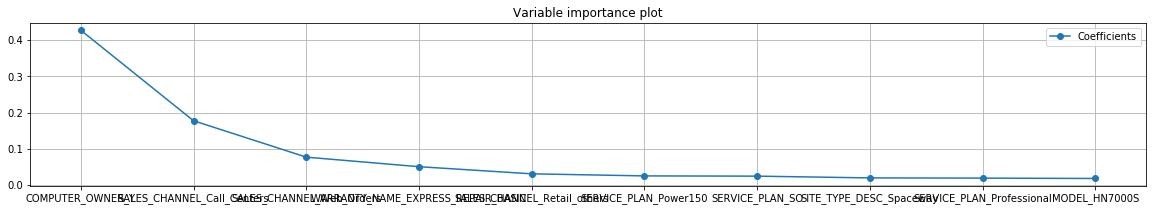

In [653]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
print(temp)
temp.plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

### Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [15]:
param_grid = {'max_depth':[19],
              'n_estimators':[150],
              'min_samples_split':[2,3,4]
              }

### Parameter tuning to find best parametres

In [695]:
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
rf.fit( X_train,Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [19], 'n_estimators': [150], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [696]:
print(rf.best_score_)
print(rf.best_params_)

0.9634541915951849
{'max_depth': 19, 'min_samples_split': 3, 'n_estimators': 150}


#### Model Building based on best parameters

In [12]:
model = RandomForestClassifier(criterion='gini', max_features='log2', n_estimators= 150,max_depth = 19,min_samples_split = 3 )  #fine tuning the model
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Evaluating Model performance

In [16]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9841418582858791
Test Accuracy score: 0.9645139589640094


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.9682324091786112
The Gini Index for the model built on the Test Data is :  0.9291045586696547


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[6753   62]
 [ 158 6900]]
Confusion matrix for Test: 
 [[2868   87]
 [ 124 2867]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9909024211298606
Sensitivity for test data :  0.9705583756345177


SPECIFICITY MATRIX ------------------------------------------------------------------------------


Specificity for train data :  0.9776140549730802
Specificity

#### Important Variables

                                    Coefficients
COMPUTER_OWNER_Y                        0.204389
SALES_CHANNEL_Call_Centers              0.149224
WARRANTY_NAME_EXPRESS_REPAIR_BASIC      0.071563
SITE_TYPE_DESC_Spaceway                 0.065735
FEEDBACK_GOOD                           0.063963
SALES_CHANNEL_Web_Orders                0.047052
MODEL_HN7000S                           0.040827
SALES_CHANNEL_Sales_Agents              0.035023
AGE                                     0.033515
INCOME                                  0.032198


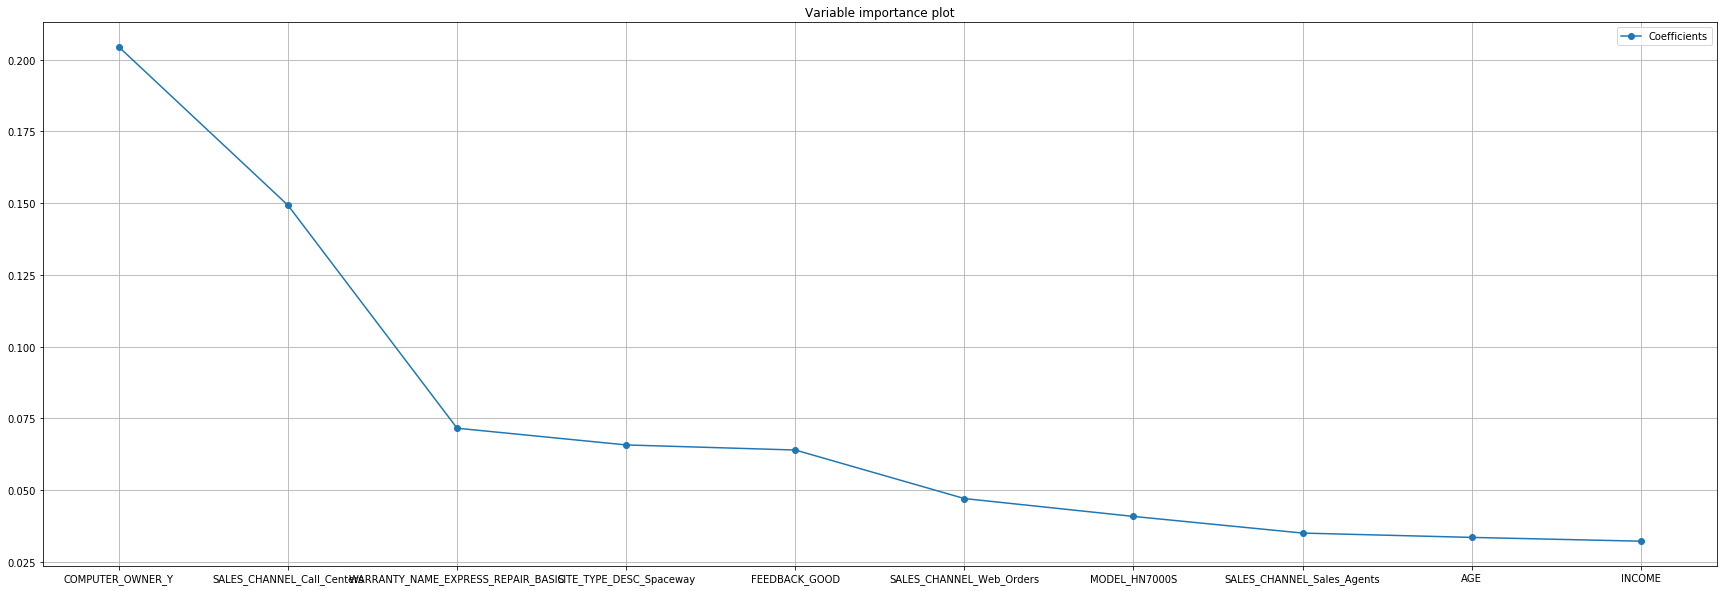

In [28]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
print(temp)
temp.plot(figsize=(30,10),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

### GBM

In [701]:
from sklearn.ensemble import GradientBoostingClassifier

In [724]:
param_grid = {'learning_rate':[0.2],
              'n_estimators':[150],
              'min_samples_split':[2,3,4,5]
                }

#### Parameter tuning to find best parameters

In [725]:
gbm = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5)
gbm.fit( X_train, Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2], 'n_estimators': [150], 'min_samples_split': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [726]:
print(gbm.best_score_)
print(gbm.best_params_)

0.9689324587327903
{'learning_rate': 0.2, 'min_samples_split': 4, 'n_estimators': 150}


#### Building model based on best parameters

In [727]:
model = GradientBoostingClassifier( learning_rate =0.2, n_estimators=100,min_samples_split = 4 )  #fine tuning the model
model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Evaluating model performance

In [728]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9709507676782239
Test Accuracy score: 0.9702320887991928


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.9418461615073845
The Gini Index for the model built on the Test Data is :  0.9405412854499837


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[6658  150]
 [ 253 6812]]
Confusion matrix for Test: 
 [[2885   70]
 [ 107 2884]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9779670975323149
Sensitivity for test data :  0.9763113367174281


SPECIFICITY MATRIX ------------------------------------------------------------------------------


Specificity for train data :  0.9641896673743807
Specificity

#### Important Variables

                                    Coefficients
COMPUTER_OWNER_Y                        0.401540
SALES_CHANNEL_Call_Centers              0.216228
SALES_CHANNEL_Web_Orders                0.065131
WARRANTY_NAME_EXPRESS_REPAIR_BASIC      0.051101
FEEDBACK_GOOD                           0.045940
SALES_CHANNEL_Retail_others             0.027831
SITE_TYPE_DESC_Spaceway                 0.027055
MODEL_HN7000S                           0.024187
SERVICE_PLAN_Power150                   0.022402
SERVICE_PLAN_SO                         0.019109


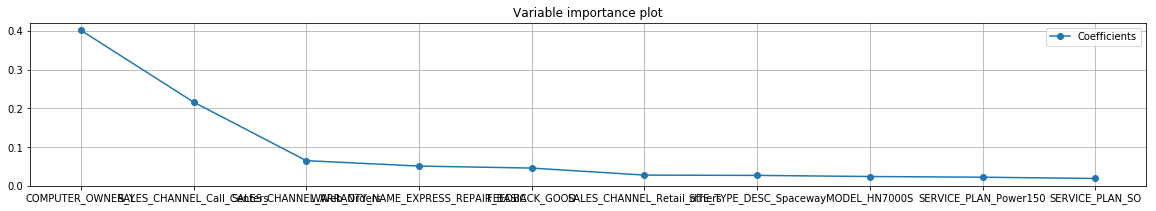

In [729]:
ce = pd.DataFrame(model.feature_importances_, X_train.columns)
ce.columns=['Coefficients']
#ce.sort_values(by = 'Coefficients',ascending = False)
temp = ce.nlargest(10, 'Coefficients')
print(temp)
temp.plot(figsize=(20,3),grid=True,title='Variable importance plot',marker='o', xticks=[0,1,2,3,4,5,6,7,8,9])

### KNN

In [730]:
from sklearn.neighbors import KNeighborsClassifier

In [747]:
param_grid = {'n_neighbors':[15,17,19,21,23,25],
              'p':[1,2]
            }

#### Parameter Tuning

In [748]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn.fit( X_train, Y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [15, 17, 19, 21, 23, 25], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [749]:
print(knn.best_score_)
print(knn.best_params_)

0.9177539104735818
{'n_neighbors': 19, 'p': 1}


#### Building model as per best parameters

In [750]:
model = KNeighborsClassifier(n_neighbors=19,p=1)  #fine tuning the model

model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=1,
           weights='uniform')

In [752]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9297195992215094
Test Accuracy score: 0.9180961991254625


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.8592215940755512
The Gini Index for the model built on the Test Data is :  0.8366178009333851


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[6220  284]
 [ 691 6678]]
Confusion matrix for Test: 
 [[2648  143]
 [ 344 2811]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9563345633456335
Sensitivity for test data :  0.9487638839125762


SPECIFICITY MATRIX ------------------------------------------------------------------------------


Specificity for train data :  0.9062287963088614
Specificity

### NAIVE BAYES

In [755]:
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [756]:
param_grid = {'alpha':[0,1]}

In [766]:
nb = GridSearchCV(BernoulliNB(), param_grid, cv=5)
nb.fit( X_train, Y_train )

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\thebu\Anaconda3\lib\s

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0, 1]}, pre_dispatch='2*n_jobs', refit=True,
       return_train_score='warn', scoring=None, verbose=0)

In [767]:
print(nb.best_score_)
print(nb.best_params_)

0.9561738628991566
{'alpha': 0}


### Building model as per best parameters

In [768]:
model = BernoulliNB(alpha= 0)
model.fit(X_train,Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


BernoulliNB(alpha=0, binarize=0.0, class_prior=None, fit_prior=True)

In [769]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9560296979744828
Test Accuracy score: 0.9572822065253952


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.9119670496858923
The Gini Index for the model built on the Test Data is :  0.9146426127538478


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[6520  219]
 [ 391 6743]]
Confusion matrix for Test: 
 [[2846  108]
 [ 146 2846]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9675025968244547
Sensitivity for test data :  0.963439404197698


SPECIFICITY MATRIX ------------------------------------------------------------------------------


Specificity for train data :  0.9451920381272778
Specificity 

### SVM

In [770]:
from sklearn.svm import SVC

In [771]:
svc = SVC()

In [772]:
svc = SVC()
param_grid = {
    'kernel': ['rbf'],
    'C': [0.01,0.1, 10, 100, 1000,10000]
}


#### Parameter tuning

In [773]:
svc= GridSearchCV(svc, param_grid, cv=5)
svc.fit(X_train, Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [0.01, 0.1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [774]:
print( svc.best_params_)
print(svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.958336336769264


#### Building model as per best parameters

In [775]:
model = SVC(C = 10, kernel= 'rbf')
model.fit(X_train,Y_train)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [776]:
print('\n')
print('ACCURACY MATRIX ------------------------------------------------------------------------------')
print('\n')
print ('Train Accuracy score:' , metrics.accuracy_score(model.predict(X_train), Y_train))
print ('Test Accuracy score:' , metrics.accuracy_score(model.predict(X_test), Y_test))
print('\n')
print('GINI  ------------------------------------------------------------------------------')
print('\n')
train_gini = 2*metrics.roc_auc_score(Y_train, model.predict(X_train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(Y_test, model.predict(X_test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)


print('\n')
print('CONFUSION MATRIX ------------------------------------------------------------------------------')
print('\n')
tr = metrics.confusion_matrix(model.predict(X_train), Y_train)
te = metrics.confusion_matrix(model.predict(X_test), Y_test)
print ('Confusion matrix for Train: \n' , metrics.confusion_matrix(model.predict(X_train), Y_train))
print ('Confusion matrix for Test: \n' , metrics.confusion_matrix(model.predict(X_test), Y_test))
print('\n')
print('\n SENSITIVITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[0][0]/(tr[0][0]+tr[0][1])
print('Sensitivity for train data : ', sensitivity1 )

sensitivity1 = te[0][0]/(te[0][0]+te[0][1])
print('Sensitivity for test data : ', sensitivity1 )
print('\n')
print('SPECIFICITY MATRIX ------------------------------------------------------------------------------')
print('\n')
sensitivity1 = tr[1][1]/(tr[1][0]+tr[1][1])
print('Specificity for train data : ', sensitivity1 )

sensitivity1 = te[1][1]/(te[1][0]+te[1][1])
print('Specificity for test data : ', sensitivity1 )



ACCURACY MATRIX ------------------------------------------------------------------------------


Train Accuracy score: 0.9767894471275139
Test Accuracy score: 0.9593003699966364


GINI  ------------------------------------------------------------------------------


The Gini Index for the model built on the Train Data is :  0.9535284481051842
The Gini Index for the model built on the Test Data is :  0.9186834039949456


CONFUSION MATRIX ------------------------------------------------------------------------------


Confusion matrix for Train: 
 [[6703  114]
 [ 208 6848]]
Confusion matrix for Test: 
 [[2851  101]
 [ 141 2853]]



 SENSITIVITY MATRIX ------------------------------------------------------------------------------


Sensitivity for train data :  0.9832771013642365
Sensitivity for test data :  0.9657859078590786


SPECIFICITY MATRIX ------------------------------------------------------------------------------


Specificity for train data :  0.9705215419501134
Specificity

### Profiling Customers Now to provide better service

In [778]:
comb_data.to_csv('complete_data.csv')

In [3]:
comb_data = pd.read_csv('complete_data.csv')

In [5]:
comb_data.index = comb_data.SITE_ACCOUNT_NUMBER
comb_data = comb_data.drop(columns= ['SITE_ACCOUNT_NUMBER'])

AttributeError: 'DataFrame' object has no attribute 'SITE_ACCOUNT_NUMBER'

### Standardizing data first

In [174]:
comb_data.head()

,ACCOUNT_STATUS,AGE,GENDER,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,UPGRADE_STATUS,COMPUTER_OWNER_Y,DIRECT_INDIRECT_CHANNEL_Indirect,FEEDBACK_GOOD,...,SERVICE_PLAN_SO,SITE_TYPE_DESC_Spaceway,WARRANTY_NAME_Broadband_Remote,WARRANTY_NAME_EXPRESS_REPAIR_BASIC,WARRANTY_NAME_EXPRESS_REPAIR_HOME,WARRANTY_NAME_EXPRESS_REPAIR_HOME_WITH_COMMITMENT_WITH_TERM,WARRANTY_NAME_SRVC_ASSUR_PLUS_NEW_CUST,WARRANTY_NAME_SRVC_ASSUR_STD_EXISTING_CUST_NO_COMMIT,WARRANTY_NAME_SRVC_ASSUR_STD_NEW_CUST,WARRANTY_NAME_Spaceway
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,,,
AMR-11112345,1,69,2,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
AMR-14837287,1,43,2,4,1,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
AMR-14837803,1,58,2,4,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AMR-14837821,1,22,1,6,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AMR-14839297,1,36,1,7,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [175]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(comb_data)

C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\thebu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [176]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = comb_data.columns

### Clustering Using K Means Cluster

In [177]:
from sklearn.cluster import KMeans

#### testing 3 cluster solution

In [141]:
km_3 = KMeans(n_clusters=4,random_state=123)
km_3.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [142]:
pd.Series(km_3.labels_).value_counts()

3    5559
1    1973
2    1413
0     971
dtype: int64

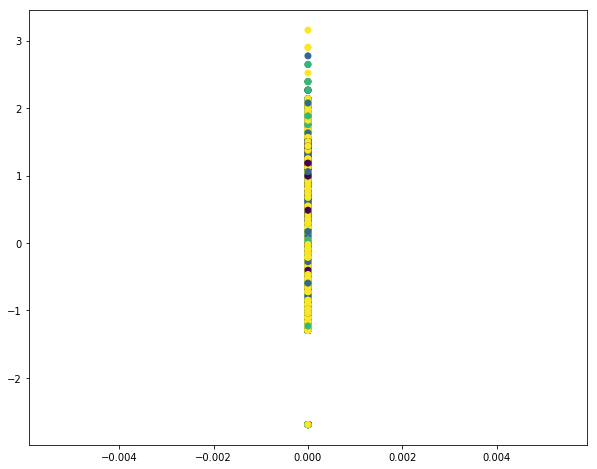

In [143]:
plt.figure(figsize=(10, 8))
plt.scatter(data_scaled.iloc[:,0], data_scaled.iloc[:,1], c=km_3.labels_.astype(float))

#### Cluster 4,5,6,7,8 Solutions

In [178]:
#3 clusters
km_3 = KMeans(n_clusters=3,random_state=123).fit(data_scaled)

# 4 clusters
km_4=KMeans(n_clusters=4,random_state=123).fit(data_scaled)

# 5 clusters
km_5=KMeans(n_clusters=5,random_state=123).fit(data_scaled)

# 6 clusters
km_6=KMeans(n_clusters=6,random_state=123).fit(data_scaled)

# 7 clusters
km_7=KMeans(n_clusters=7,random_state=123).fit(data_scaled)

# 8 clusters
km_8=KMeans(n_clusters=8,random_state=123).fit(data_scaled)

#### Silhouette Coefficient to find optimum cluster solution

In [189]:
from sklearn import metrics
# calculate SC for K=3 through K=8
k_range = range(3, 8,1)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(data_scaled)
    scores.append(metrics.silhouette_score(data_scaled, km.labels_))

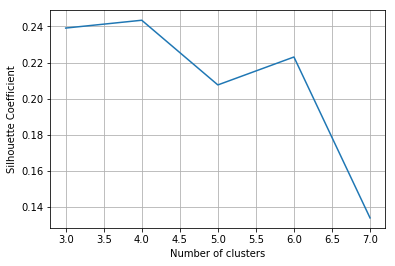

In [190]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

#### calinski harabaz score to find optimum solution

In [161]:
# calculate for K=2 through K=8
from sklearn.metrics import calinski_harabaz_score
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=100)
    km.fit_transform(data_scaled)
    scores.append(calinski_harabaz_score(data_scaled,km.labels_))

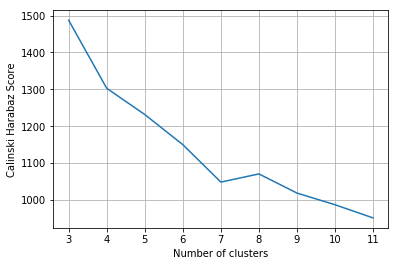

In [162]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabaz Score')
plt.grid(True)

#### Elbow Analysis to find Optimum Solution

In [192]:
# calculate for K=2 through K=8
k_range = range(3, 8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(data_scaled)
    scores.append(km.inertia_)
scores

[759588.6604294096,
 720827.05609965,
 692722.5626220651,
 666389.1569852694,
 652681.8073788612]

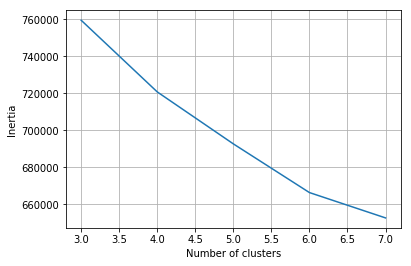

In [193]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

#### Profiling

In [183]:
# Conactenating labels found through Kmeans with data 
data_scaled['cluster_3'] = km_3.labels_
data_scaled['cluster_4'] = km_4.labels_
data_scaled['cluster_5'] = km_5.labels_
data_scaled['cluster_6'] = km_6.labels_
data_scaled['cluster_7'] = km_7.labels_
data_scaled['cluster_8'] = km_8.labels_

In [184]:
size=pd.concat([pd.Series(data_scaled.cluster_3.size), pd.Series.sort_index(data_scaled.cluster_3.value_counts()), pd.Series.sort_index(data_scaled.cluster_4.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_5.value_counts()), pd.Series.sort_index(data_scaled.cluster_6.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_7.value_counts()), pd.Series.sort_index(data_scaled.cluster_8.value_counts())])

In [185]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size*100/data_scaled.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,100.0,15.449821,50.66855,33.881629,35.622383,50.491952,3.895252,9.990413,6.988244,50.481861,...,37.867703,5.913517,5.89838,9.682628,8.819819,31.903729,11.786669,0.141279,28.67955,3.087946


In [186]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_scaled.apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_3').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_5').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_7').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [187]:
Profling_output_final.to_csv('Profiling_output.csv')

### Based on silhoutee coefficient and Profiling ideal number of cluster solution is = 3